In [14]:
#!pip install tableone squarify wandb plotly

In [ ]:
## Import libraries 

import pandas as pd
from functools import reduce
# Import LabelEncoder

# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

# Vizualization
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import class_weight
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import xgboost as xgb
from xgboost import XGBClassifier
#from functions import run_exps

import warnings
warnings.filterwarnings('ignore') 

from tableone import TableOne, load_dataset
from joblib import dump, load
import wandb

In [16]:
business = pd.read_csv('./data/business.csv')
attributes = pd.read_csv('./data/atributtes_clean.csv', low_memory=False)
categories = pd.read_csv('./data/categories_fixed.csv')
hours = pd.read_csv('./data/hours_fixed.csv')
gps = pd.read_csv('./data/gps_clustering.csv')
checkins = pd.read_csv('./data/n_checkins.csv')
top_tips = pd.read_csv('./data/top_tips.csv')
#metrics = pd.read_csv('./data/crude_metrics.csv')
target = pd.read_csv('./data/target.csv')
sentiment = pd.read_csv('./data/sentiment_ok_unique.csv')

In [17]:
business

,business_id,name,postal_code,latitude,longitude,stars,review_count,is_open
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ",93101,34.426679,-119.711197,5.0,7,0
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,63123,38.551126,-90.335695,3.0,15,1
2,tUFrWirKiKi_TAnsVWINQQ,Target,85711,32.223236,-110.880452,3.5,22,0
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,19107,39.955505,-75.155564,4.0,80,1
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,18054,40.338183,-75.471659,4.5,13,1
...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,T6J 5H2,53.468419,-113.492054,3.0,13,1
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,37204,36.115118,-86.766925,4.0,5,1
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,46250,39.908707,-86.065088,3.5,8,1
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,62025,38.782351,-89.950558,4.0,24,1


In [18]:
attributes

,good_ambience,garage,BusinessAcceptsCreditCards,RestaurantsPriceRange2,BikeParking,WiFi,delivery,GoodForKids,OutdoorSeating,RestaurantsReservations,HasTV,RestaurantsGoodForGroups,Alcohol,ByAppointmentOnly,Caters,RestaurantsAttire,NoiseLevel,meal_diversity,business_id
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Pns2l4eNsfO8kk83dixA6A
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,mpf3x-BjTdTEA3yCZrAYPw
2,0,0,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,tUFrWirKiKi_TAnsVWINQQ
3,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,MTSW4McQd7CbVtyjqoe9mw
4,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,mWMc6_wTdE0EUBKIGXDVfA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,IUQopTMmYQG-qRtBk-8QnA
150342,0,0,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,c8GjPIOTGVmIemT7j5_SyQ
150343,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,_QAMST-NrQobXduilWEqSw
150344,0,0,1,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,mtGm22y5c2UHNXDFAjaPNw


In [19]:
categories

,Restaurants,Food,Shopping,Home Services,Beauty & Spas,Nightlife,Health & Medical,Local Services,Bars,Automotive,total_categories,business_id
0,0,0,0,0,0,0,1,0,0,0,6,Pns2l4eNsfO8kk83dixA6A
1,0,0,0,0,0,0,0,1,0,0,5,mpf3x-BjTdTEA3yCZrAYPw
2,0,0,1,0,0,0,0,0,0,0,6,tUFrWirKiKi_TAnsVWINQQ
3,1,1,0,0,0,0,0,0,0,0,5,MTSW4McQd7CbVtyjqoe9mw
4,0,1,0,0,0,0,0,0,0,0,3,mWMc6_wTdE0EUBKIGXDVfA
...,...,...,...,...,...,...,...,...,...,...,...,...
150238,0,0,0,0,1,0,0,0,0,0,2,IUQopTMmYQG-qRtBk-8QnA
150239,0,0,1,0,0,0,0,0,0,0,7,c8GjPIOTGVmIemT7j5_SyQ
150240,0,0,1,0,1,0,0,0,0,0,7,_QAMST-NrQobXduilWEqSw
150241,0,0,1,0,0,0,0,0,0,0,5,mtGm22y5c2UHNXDFAjaPNw


In [20]:
hours

,business_id,7days,weekends,n_open_days,mean_total_hours_open,mean_open_hour,mean_close_hour
0,Pns2l4eNsfO8kk83dixA6A,0,0,0,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,0,0,6,12.000000,0 days 06:40:00,0 days 14:40:00
2,tUFrWirKiKi_TAnsVWINQQ,1,1,7,14.285714,0 days 08:00:00,0 days 22:17:08.571428571
3,MTSW4McQd7CbVtyjqoe9mw,1,1,7,13.428571,0 days 07:00:00,0 days 20:25:42.857142857
4,mWMc6_wTdE0EUBKIGXDVfA,0,1,5,8.000000,0 days 13:12:00,0 days 21:12:00
...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,1,1,7,8.714286,0 days 10:08:34.285714285,0 days 18:51:25.714285714
150342,c8GjPIOTGVmIemT7j5_SyQ,1,1,7,9.142857,0 days 08:04:17.142857142,0 days 17:12:51.428571428
150343,_QAMST-NrQobXduilWEqSw,0,0,0,NaN,NaN,NaN
150344,mtGm22y5c2UHNXDFAjaPNw,1,1,7,10.000000,0 days 09:08:34.285714285,0 days 19:08:34.285714285


In [21]:
gps

,latitude,longitude,business_id,areas
0,34.426679,-119.711197,Pns2l4eNsfO8kk83dixA6A,0
1,38.551126,-90.335695,mpf3x-BjTdTEA3yCZrAYPw,2
2,32.223236,-110.880452,tUFrWirKiKi_TAnsVWINQQ,4
3,39.955505,-75.155564,MTSW4McQd7CbVtyjqoe9mw,3
4,40.338183,-75.471659,mWMc6_wTdE0EUBKIGXDVfA,9
...,...,...,...,...
150341,53.468419,-113.492054,IUQopTMmYQG-qRtBk-8QnA,6
150342,36.115118,-86.766925,c8GjPIOTGVmIemT7j5_SyQ,5
150343,39.908707,-86.065088,_QAMST-NrQobXduilWEqSw,8
150344,38.782351,-89.950558,mtGm22y5c2UHNXDFAjaPNw,2


In [22]:
checkins

,business_id,number_visits
0,---kPU91CF4Lq2-WlRu9Lw,11
1,--0iUa4sNDFiZFrAdIWhZQ,10
2,--30_8IhuyMHbSOcNWd6DQ,2
3,--7PUidqRWpRSpXebiyxTg,10
4,--7jw19RH9JKXgFohspgQw,26
...,...,...
131925,zznJox6-nmXlGYNWgTDwQQ,67
131926,zznZqH9CiAznbkV6fXyHWA,1
131927,zzu6_r3DxBJuXcjnOYVdTw,23
131928,zzw66H6hVjXQEt0Js3Mo4A,2


In [23]:
top_tips

,number_tips,business_id
0,2571,FEXhWNCMkv22qG04E83Qjg
1,1011,-QI8Qi8XWH3D8y8ethnajA
2,932,_ab50qdWOk0DdB6XOrBitw
3,827,ytynqOUb3hjKeJfRj5Tshw
4,826,Eb1XmmLWyt_way5NNZ7-Pw
...,...,...
106188,1,JnQd5ZdfFhIDDq1CTcSaaA
106189,1,xRaddmd73rkdLxUx7Grtcg
106190,1,JjRSWWCp8Yd2gnqIMY0DiA
106191,1,4D2NVjVRANfHaROxuqlkDA


In [24]:
data_frames = [business, attributes, categories, hours, gps, checkins, top_tips, target]
full_data = reduce(lambda left,right: pd.merge(left,right,on='business_id', how='left'), data_frames)

In [25]:
full_data.shape

(150346, 55)

In [26]:
full_data.to_csv('./data/full_data.csv', index=False)

In [27]:
full_data.columns.tolist()

['business_id',
 'name',
 'postal_code',
 'latitude_x',
 'longitude_x',
 'stars',
 'review_count_x',
 'is_open',
 'good_ambience',
 'garage',
 'BusinessAcceptsCreditCards',
 'RestaurantsPriceRange2',
 'BikeParking',
 'WiFi',
 'delivery',
 'GoodForKids',
 'OutdoorSeating',
 'RestaurantsReservations',
 'HasTV',
 'RestaurantsGoodForGroups',
 'Alcohol',
 'ByAppointmentOnly',
 'Caters',
 'RestaurantsAttire',
 'NoiseLevel',
 'meal_diversity',
 'Restaurants',
 'Food',
 'Shopping',
 'Home Services',
 'Beauty & Spas',
 'Nightlife',
 'Health & Medical',
 'Local Services',
 'Bars',
 'Automotive',
 'total_categories',
 '7days',
 'weekends',
 'n_open_days',
 'mean_total_hours_open',
 'mean_open_hour',
 'mean_close_hour',
 'latitude_y',
 'longitude_y',
 'areas',
 'number_visits',
 'number_tips',
 'Unnamed: 0',
 'review_count_y',
 'avg(reactions)',
 'avg(stars)',
 'avg(Influencer)',
 'success_score',
 'target']

In [28]:
subset1list = ['business_id',
 'is_open',
 'good_ambience',
 'garage',
 'RestaurantsPriceRange2',
 'OutdoorSeating',
 'Alcohol',
 'RestaurantsAttire',
 'NoiseLevel',
 'meal_diversity',
 'Restaurants',
 'Home Services',
 'Health & Medical',
 'Bars',
 'Automotive',
 'total_categories',
 '7days',
 'weekends',
 'mean_total_hours_open',
 'areas',
 'target']

In [29]:
subset2list = ['business_id',
 'good_ambience',
 'meal_diversity',
 'total_categories',
 'weekends',
 'mean_total_hours_open',
 'areas',
 'target']

In [30]:
subset1 = full_data[subset1list]

In [31]:
subset1.head()

,business_id,is_open,good_ambience,garage,RestaurantsPriceRange2,OutdoorSeating,Alcohol,RestaurantsAttire,NoiseLevel,meal_diversity,...,Home Services,Health & Medical,Bars,Automotive,total_categories,7days,weekends,mean_total_hours_open,areas,target
0,Pns2l4eNsfO8kk83dixA6A,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,6.0,0,0,NaN,0,0
1,mpf3x-BjTdTEA3yCZrAYPw,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,5.0,0,0,12.000000,2,0
2,tUFrWirKiKi_TAnsVWINQQ,0,0,0,2,0,0,0,0,0,...,0.0,0.0,0.0,0.0,6.0,1,1,14.285714,4,0
3,MTSW4McQd7CbVtyjqoe9mw,1,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,5.0,1,1,13.428571,3,1
4,mWMc6_wTdE0EUBKIGXDVfA,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,3.0,0,1,8.000000,9,0


In [32]:
subset1

,business_id,is_open,good_ambience,garage,RestaurantsPriceRange2,OutdoorSeating,Alcohol,RestaurantsAttire,NoiseLevel,meal_diversity,...,Home Services,Health & Medical,Bars,Automotive,total_categories,7days,weekends,mean_total_hours_open,areas,target
0,Pns2l4eNsfO8kk83dixA6A,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,6.0,0,0,NaN,0,0
1,mpf3x-BjTdTEA3yCZrAYPw,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,5.0,0,0,12.000000,2,0
2,tUFrWirKiKi_TAnsVWINQQ,0,0,0,2,0,0,0,0,0,...,0.0,0.0,0.0,0.0,6.0,1,1,14.285714,4,0
3,MTSW4McQd7CbVtyjqoe9mw,1,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,5.0,1,1,13.428571,3,1
4,mWMc6_wTdE0EUBKIGXDVfA,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,3.0,0,1,8.000000,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,1,0,0,3,0,0,0,0,0,...,0.0,0.0,0.0,0.0,2.0,1,1,8.714286,6,0
150342,c8GjPIOTGVmIemT7j5_SyQ,1,0,0,2,0,0,0,0,0,...,0.0,0.0,0.0,0.0,7.0,1,1,9.142857,5,0
150343,_QAMST-NrQobXduilWEqSw,1,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,7.0,0,0,NaN,8,0
150344,mtGm22y5c2UHNXDFAjaPNw,1,0,0,4,0,0,0,0,0,...,0.0,0.0,0.0,0.0,5.0,1,1,10.000000,2,0


In [33]:
subset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150346 entries, 0 to 150345
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   business_id             150346 non-null  object 
 1   is_open                 150346 non-null  int64  
 2   good_ambience           150346 non-null  int64  
 3   garage                  150346 non-null  int64  
 4   RestaurantsPriceRange2  150346 non-null  int64  
 5   OutdoorSeating          150346 non-null  int64  
 6   Alcohol                 150346 non-null  int64  
 7   RestaurantsAttire       150346 non-null  int64  
 8   NoiseLevel              150346 non-null  int64  
 9   meal_diversity          150346 non-null  int64  
 10  Restaurants             150243 non-null  float64
 11  Home Services           150243 non-null  float64
 12  Health & Medical        150243 non-null  float64
 13  Bars                    150243 non-null  float64
 14  Automotive          

In [34]:
subset1.columns.tolist()

['business_id',
 'is_open',
 'good_ambience',
 'garage',
 'RestaurantsPriceRange2',
 'OutdoorSeating',
 'Alcohol',
 'RestaurantsAttire',
 'NoiseLevel',
 'meal_diversity',
 'Restaurants',
 'Home Services',
 'Health & Medical',
 'Bars',
 'Automotive',
 'total_categories',
 '7days',
 'weekends',
 'mean_total_hours_open',
 'areas',
 'target']

In [35]:
cat_encode = [
 'is_open',
 'good_ambience',
 'garage',
 'RestaurantsPriceRange2',
 'OutdoorSeating',
 'Alcohol',
 'RestaurantsAttire',
 'NoiseLevel',
 'meal_diversity',
 'Restaurants',
 'Home Services',
 'Health & Medical',
 'Bars',
 'Automotive',
 'total_categories',
 '7days',
 'weekends',
 'areas',
 'target']

In [36]:
# Print the head of the categorical columns
print(subset1[cat_encode].head())

# Create LabelEncoder object: le
le = LabelEncoder()

# Apply LabelEncoder to categorical columns
subset1[cat_encode] = subset1[cat_encode].apply(lambda x: le.fit_transform(x))

# Print the head of the LabelEncoded categorical columns
print(subset1[cat_encode].head())

   is_open  good_ambience  garage  RestaurantsPriceRange2  OutdoorSeating  \
0        0              0       0                       0               0   
1        1              0       0                       0               0   
2        0              0       0                       2               0   
3        1              0       0                       1               0   
4        1              0       0                       0               0   

   Alcohol  RestaurantsAttire  NoiseLevel  meal_diversity  Restaurants  \
0        0                  0           0               0          0.0   
1        0                  0           0               0          0.0   
2        0                  0           0               0          0.0   
3        0                  0           0               0          1.0   
4        0                  0           0               0          0.0   

   Home Services  Health & Medical  Bars  Automotive  total_categories  7days  \
0          

In [37]:
subset1.isna().sum()

business_id                   0
is_open                       0
good_ambience                 0
garage                        0
RestaurantsPriceRange2        0
OutdoorSeating                0
Alcohol                       0
RestaurantsAttire             0
NoiseLevel                    0
meal_diversity                0
Restaurants                   0
Home Services                 0
Health & Medical              0
Bars                          0
Automotive                    0
total_categories              0
7days                         0
weekends                      0
mean_total_hours_open     23223
areas                         0
target                        0
dtype: int64

In [38]:
lista = ['Restaurants',
 'Home Services',
 'Health & Medical',
 'Bars',
 'Automotive',
 'total_categories']

for i in lista:
    subset1[i].fillna(0, inplace=True)

In [39]:
lista_na = subset1.loc[:, subset1.isna().any()].columns.tolist()

# Imputing with MICE
subset1_mice = subset1.filter(lista_na, axis=1).copy()

# Define MICE Imputer and fill missing values
mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')

df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(subset1_mice), columns=subset1_mice.columns)

subset1[df_mice_imputed.columns.tolist()] = df_mice_imputed

In [40]:
subset1.isna().sum()

business_id               0
is_open                   0
good_ambience             0
garage                    0
RestaurantsPriceRange2    0
OutdoorSeating            0
Alcohol                   0
RestaurantsAttire         0
NoiseLevel                0
meal_diversity            0
Restaurants               0
Home Services             0
Health & Medical          0
Bars                      0
Automotive                0
total_categories          0
7days                     0
weekends                  0
mean_total_hours_open     0
areas                     0
target                    0
dtype: int64

<AxesSubplot: >

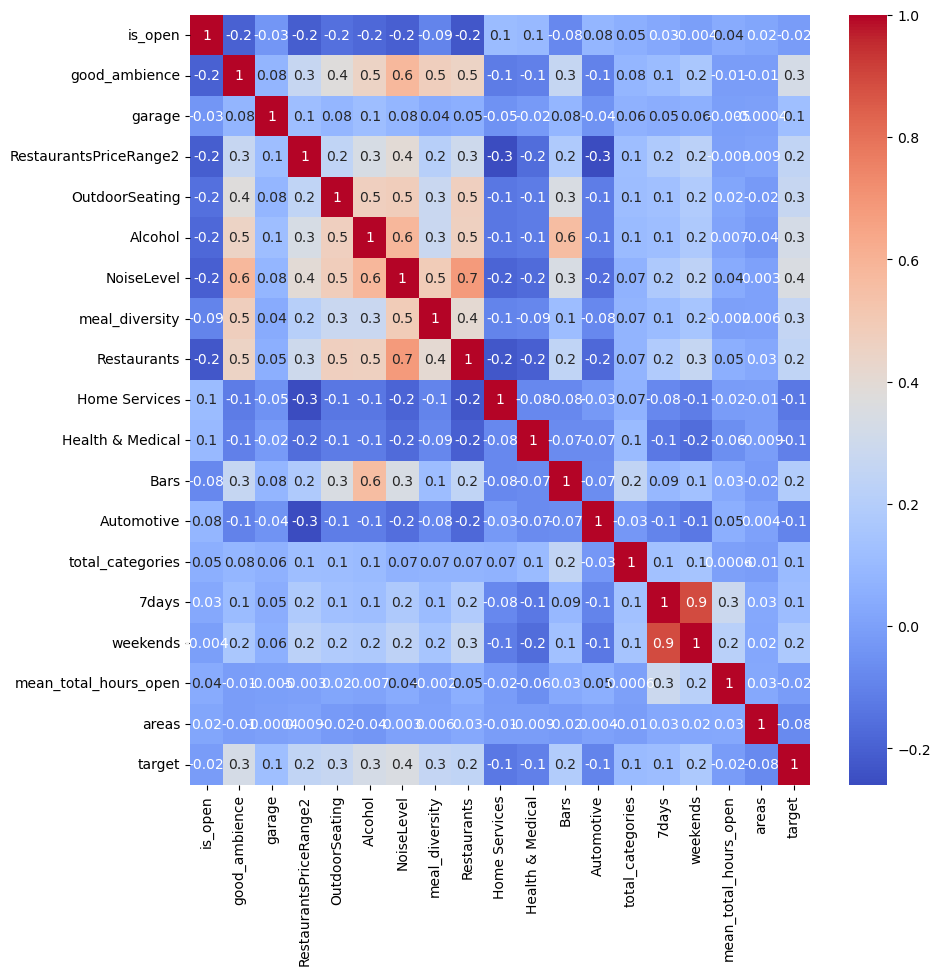

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(subset1.drop('RestaurantsAttire', axis =1).corr(method='spearman'), annot=True, fmt='.1g', cmap='coolwarm')

<AxesSubplot: >

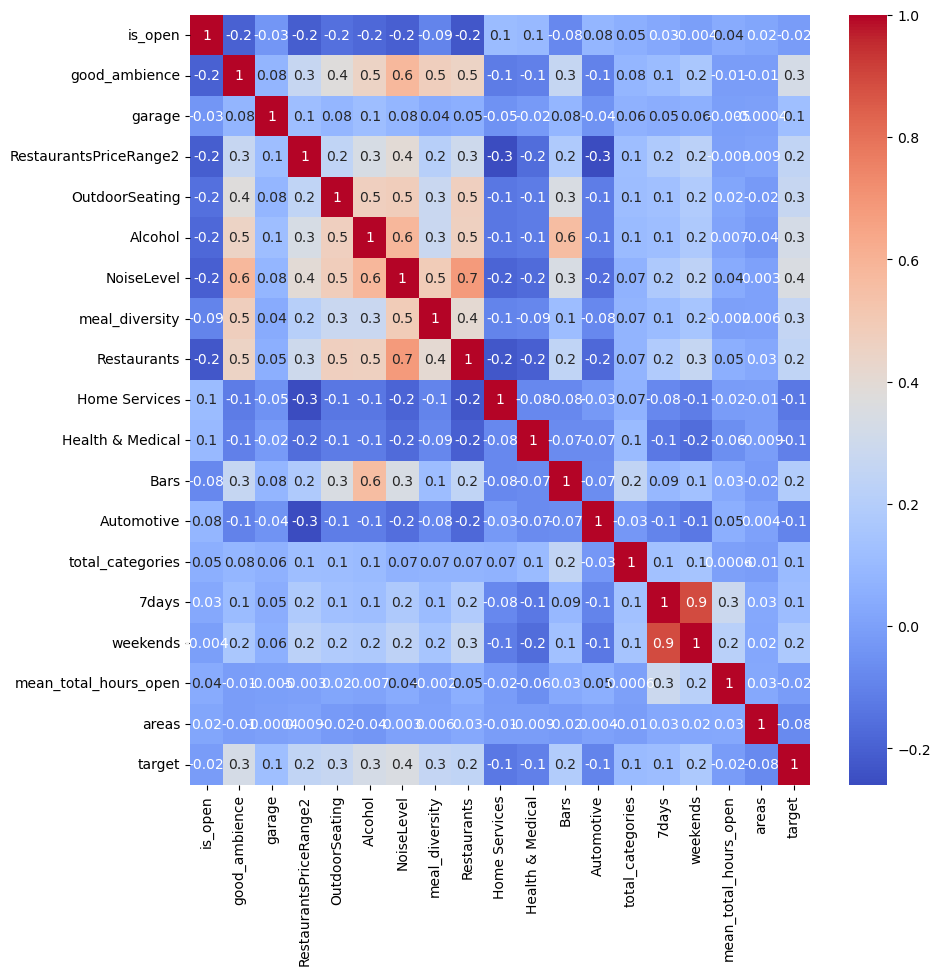

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(subset1.drop('RestaurantsAttire', axis =1).corr(method='spearman'), annot=True, fmt='.1g', cmap='coolwarm')

<AxesSubplot: >

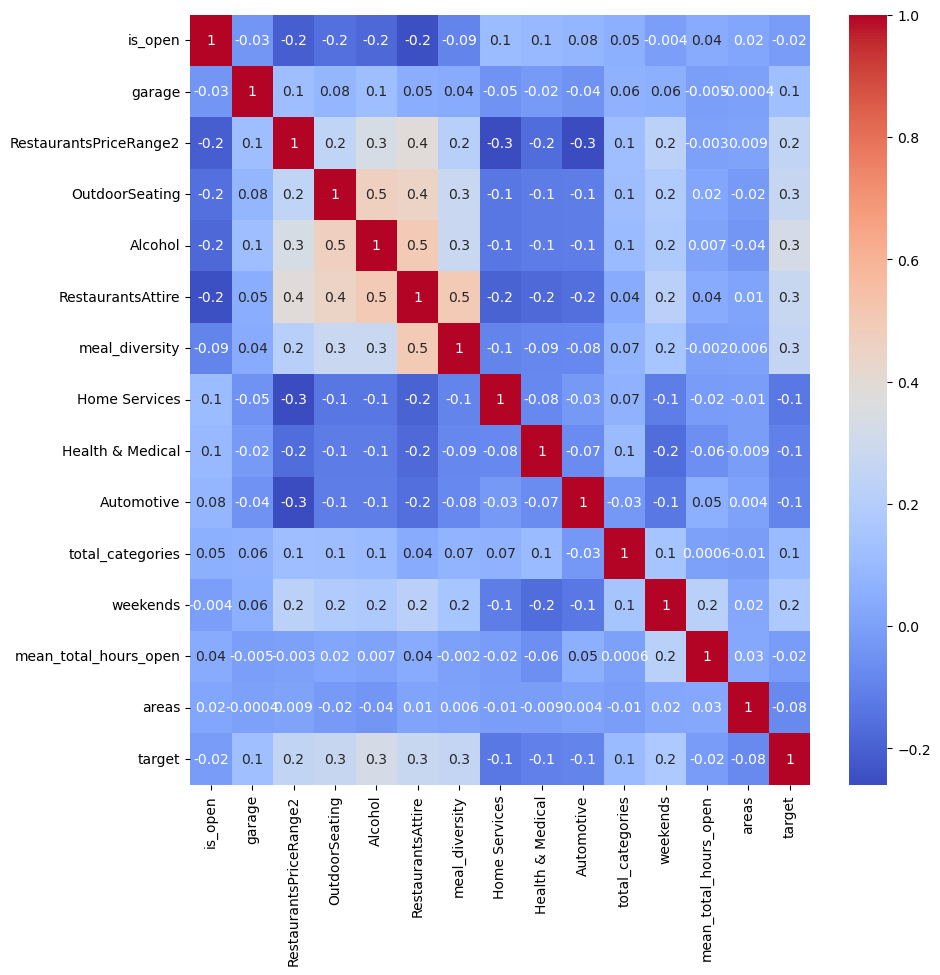

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(subset1.drop(['NoiseLevel','good_ambience', '7days', 'Bars', 'Restaurants'], axis =1).corr(method='spearman'), annot=True, fmt='.1g', cmap='coolwarm')

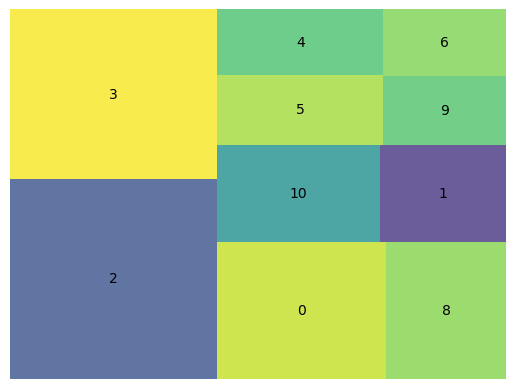

In [44]:
top = subset1.groupby('areas').agg({'target':'sum'}).sort_values(by='target', ascending=False).head(10)

squarify.plot(sizes=top['target'], label=top.index, alpha=.8 )
plt.axis('off')
plt.show()

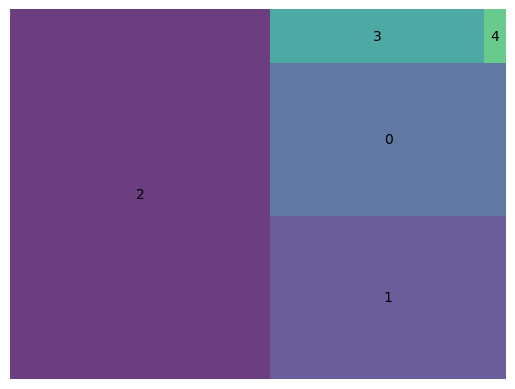

In [45]:
top = subset1.groupby('RestaurantsPriceRange2').agg({'target':'sum'}).sort_values(by='target', ascending=False).head(10)

squarify.plot(sizes=top['target'], label=top.index, alpha=.8 )
plt.axis('off')
plt.show()

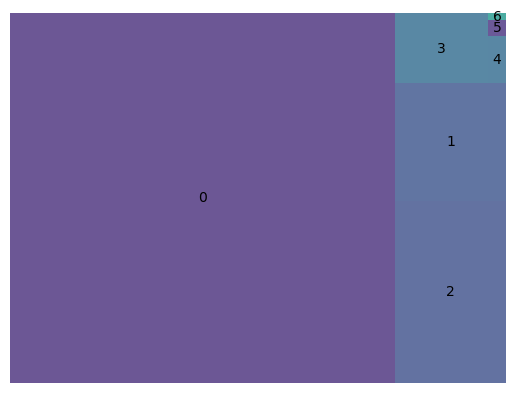

In [46]:
top = subset1.groupby('meal_diversity').agg({'target':'sum'}).sort_values(by='target', ascending=False).head(10)

squarify.plot(sizes=top['target'], label=top.index, alpha=.8 )
plt.axis('off')
plt.show()

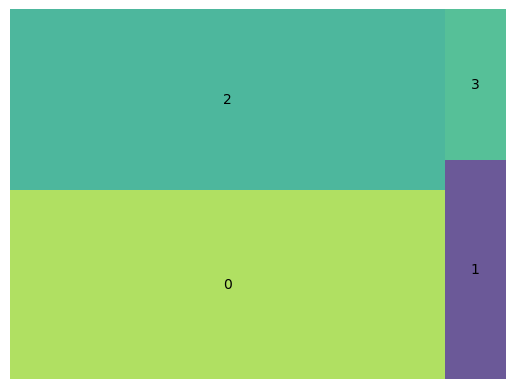

In [47]:
top = subset1.groupby('NoiseLevel').agg({'target':'sum'}).sort_values(by='target', ascending=False).head(10)

squarify.plot(sizes=top['target'], label=top.index, alpha=.8 )
plt.axis('off')
plt.show()

In [48]:
subset1.describe()

,is_open,good_ambience,garage,RestaurantsPriceRange2,OutdoorSeating,Alcohol,RestaurantsAttire,NoiseLevel,meal_diversity,Restaurants,Home Services,Health & Medical,Bars,Automotive,total_categories,7days,weekends,mean_total_hours_open,areas,target
count,150346.00000,150346.000000,150346.000000,150346.000000,150346.000000,150346.000000,150346.000000,150346.000000,150346.000000,150346.000000,150346.000000,150346.000000,150346.000000,150346.000000,150346.000000,150346.000000,150346.000000,150346.000000,150346.000000,150346.000000
mean,0.79615,0.117722,0.027536,1.002827,0.149981,0.147932,0.260845,0.481596,0.150253,0.349022,0.096857,0.080454,0.074967,0.073025,3.465859,0.474146,0.534115,10.772699,4.420304,0.203870
std,0.40286,0.322279,0.163641,1.002315,0.357054,0.355034,0.439097,0.873462,0.555142,0.478097,0.298071,0.274504,0.265928,0.262798,2.313242,0.499333,0.498836,3.820062,3.160624,0.402875
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016667,0.000000,0.000000
25%,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,8.800000,2.000000,0.000000
50%,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,10.666667,3.000000,0.000000
75%,1.00000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,11.428571,8.000000,0.000000
max,1.00000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,3.000000,6.000000,2.000000,2.000000,2.000000,2.000000,2.000000,27.000000,1.000000,1.000000,24.000000,10.000000,1.000000


In [49]:
cat1 = [
 'is_open',
 'good_ambience',
 'garage',
 'RestaurantsPriceRange2',
 'OutdoorSeating',
 'Alcohol',
 'RestaurantsAttire',
 'NoiseLevel',
 'meal_diversity',
 'Restaurants',
 'Home Services',
 'Health & Medical',
 'Bars',
 'Automotive',
 '7days',
 'weekends',
 'areas',
 'target']

In [50]:
#https://tableone.readthedocs.io/en/latest/quickstart.html

mytable = TableOne(subset1.drop('business_id', axis =1), dip_test=True, normal_test=True, tukey_test=True, categorical = cat1)

mytable.tableone

Missing        Overall
n                                      150346
is_open, n (%)       0       0   30648 (20.4)
                     1          119698 (79.6)
good_ambience, n (%) 0       0  132647 (88.2)
                     1           17699 (11.8)
...                        ...            ...
areas, n (%)         7             4471 (3.0)
                     8            11266 (7.5)
                     9            14043 (9.3)
target, n (%)        0       0  119695 (79.6)
                     1           30651 (20.4)

[63 rows x 2 columns]

In [51]:
cat1 = [
 'is_open',
 'good_ambience',
 'garage',
 'RestaurantsPriceRange2',
 'OutdoorSeating',
 'Alcohol',
 'RestaurantsAttire',
 'NoiseLevel',
 'meal_diversity',
 'Restaurants',
 'Home Services',
 'Health & Medical',
 'Bars',
 'Automotive',
 '7days',
 'weekends',
 'areas',
 'target']

In [52]:
mytable2 = TableOne(subset1.drop(['business_id'], axis =1), groupby='target', pval=True, categorical = cat1, rename={'target': 'Sucessfull or not'})

mytable2.tableone.to_html('mytable2.html')

IS OPEN NOT RELEVANT for target
TO MUCH CORRELATION BETWEEN ALCOHOL and bars, and restaurants with restaurants features.

Also correlation with weekends and 7days. 

In [53]:
subset1.drop(['is_open'], axis =1).to_csv('subset1.csv')

In [54]:
subset1.drop(['is_open'], axis =1).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150346 entries, 0 to 150345
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   business_id             150346 non-null  object 
 1   good_ambience           150346 non-null  int64  
 2   garage                  150346 non-null  int64  
 3   RestaurantsPriceRange2  150346 non-null  int64  
 4   OutdoorSeating          150346 non-null  int64  
 5   Alcohol                 150346 non-null  int64  
 6   RestaurantsAttire       150346 non-null  int64  
 7   NoiseLevel              150346 non-null  int64  
 8   meal_diversity          150346 non-null  int64  
 9   Restaurants             150346 non-null  int64  
 10  Home Services           150346 non-null  int64  
 11  Health & Medical        150346 non-null  int64  
 12  Bars                    150346 non-null  int64  
 13  Automotive              150346 non-null  int64  
 14  total_categories    

<AxesSubplot: >

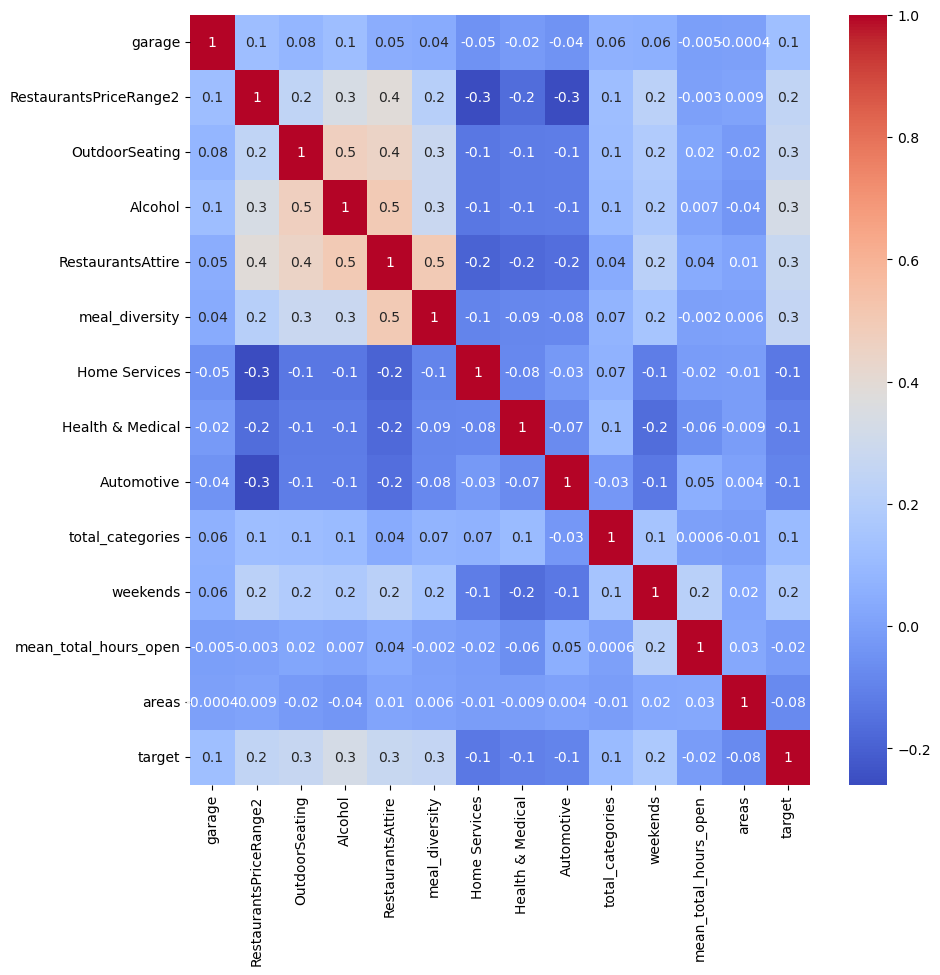

In [55]:
plt.figure(figsize=(10,10))
sns.heatmap(subset1.drop(['is_open', 'NoiseLevel','good_ambience', '7days', 'Bars', 'Restaurants'], axis =1).corr(method='spearman'), annot=True, fmt='.1g', cmap='coolwarm')

In [56]:
subset1_final = subset1.drop(['is_open', 'NoiseLevel','good_ambience', '7days', 'Bars', 'Restaurants'], axis = 1)

In [57]:
subset1_final.to_csv('./data/subsets/ml_2.csv')

In [59]:
def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
        """
        It takes in the training and test splits, and then runs a bunch of models on them, returning a
        dataframe of the results
        
        :param X_train: training split
        :param y_train: training target vector
        :param X_test: test split
        :param y_test: test target vector

        :type X_train: pd.DataFrame
        :type y_train: pd.DataFrame
        :type X_test: pd.DataFrame
        :type y_test: pd.DataFrame

        :return: A dataframe of predictions
        """
        
        dfs = []
        #dt = DecisionTreeClassifier(max_depth=1)

        models = [
                ('LogReg', LogisticRegression()), 
                ('RF', RandomForestClassifier()),
                ('KNN', KNeighborsClassifier()),
                ('GNB', GaussianNB()),
                ('XGB', XGBClassifier()),
                ('ADA', AdaBoostClassifier())
                ]
        results = []
        names = []

        scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
        target_names = ['business_fail','business_success']

        for name, model in models:
                kfold = KFold(n_splits=5, shuffle=True, random_state=90210)
                cv_results = cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
                clf = model.fit(X_train, y_train)
                y_pred = clf.predict(X_test)
                print(name)
                print(classification_report(y_test, y_pred))#, target_names=target_names))
                results.append(cv_results)
                names.append(name)
                this_df = pd.DataFrame(cv_results)
                this_df['model'] = name
                dfs.append(this_df)
        final = pd.concat(dfs, ignore_index=True)
        return final

In [70]:
subset1_final = pd.read_csv('./data/subsets/ml_2.csv')

In [71]:
subset1_final = subset1_final.loc[subset1_final['areas'] != 7, :]

In [72]:
subset1_final.index = subset1_final['business_id']
subset1_final.drop(['business_id', 'Unnamed: 0'], axis = 1, inplace = True)

In [73]:
subset1_final.shape

(145875, 14)

In [74]:
subset1_final.head()

,garage,RestaurantsPriceRange2,OutdoorSeating,Alcohol,RestaurantsAttire,meal_diversity,Home Services,Health & Medical,Automotive,total_categories,weekends,mean_total_hours_open,areas,target
business_id,,,,,,,,,,,,,,
Pns2l4eNsfO8kk83dixA6A,0,0,0,0,0,0,0,1,0,5,0,10.772699,0,0
mpf3x-BjTdTEA3yCZrAYPw,0,0,0,0,0,0,0,0,0,4,0,12.000000,2,0
tUFrWirKiKi_TAnsVWINQQ,0,2,0,0,0,0,0,0,0,5,1,14.285714,4,0
MTSW4McQd7CbVtyjqoe9mw,0,1,0,0,0,0,0,0,0,4,1,13.428571,3,1
mWMc6_wTdE0EUBKIGXDVfA,0,0,0,0,0,0,0,0,0,2,1,8.000000,9,0


In [75]:
ohe = OneHotEncoder(sparse=False)
to_transform = ['areas']
X = ohe.fit_transform(subset1_final[to_transform])
X = pd.DataFrame(X, columns=ohe.get_feature_names(to_transform),index=subset1_final.index)
subset1_final = pd.concat([subset1_final, X], axis=1)
subset1_final.drop(to_transform, axis=1, inplace=True)

In [76]:
subset1_final.shape

(145875, 23)

In [77]:
subset1_final.fillna(0, inplace = True)

In [78]:
subset1_final.columns

Index(['garage', 'RestaurantsPriceRange2', 'OutdoorSeating', 'Alcohol',
       'RestaurantsAttire', 'meal_diversity', 'Home Services',
       'Health & Medical', 'Automotive', 'total_categories', 'weekends',
       'mean_total_hours_open', 'target', 'areas_0', 'areas_1', 'areas_2',
       'areas_3', 'areas_4', 'areas_5', 'areas_6', 'areas_8', 'areas_9',
       'areas_10'],
      dtype='object')

In [79]:
X_train, X_test, y_train, y_test = train_test_split(
    subset1_final.drop('target', axis=1), subset1_final['target'], test_size=0.2,
    random_state=42, stratify=subset1_final['target'])

In [80]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# EXPERIMENTS

In [81]:
wandb.login()

wandb: Currently logged in as: maico (hayequipo). Use `wandb login --relogin` to force relogin


True

In [83]:
final = run_exps(X_train, y_train, X_test, y_test)

LogReg
              precision    recall  f1-score   support

           0       0.84      0.96      0.90     23202
           1       0.66      0.30      0.41      5973

    accuracy                           0.82     29175
   macro avg       0.75      0.63      0.65     29175
weighted avg       0.80      0.82      0.80     29175

RF
              precision    recall  f1-score   support

           0       0.85      0.91      0.88     23202
           1       0.52      0.38      0.44      5973

    accuracy                           0.80     29175
   macro avg       0.68      0.64      0.66     29175
weighted avg       0.78      0.80      0.79     29175

KNN
              precision    recall  f1-score   support

           0       0.85      0.93      0.89     23202
           1       0.56      0.35      0.43      5973

    accuracy                           0.81     29175
   macro avg       0.70      0.64      0.66     29175
weighted avg       0.79      0.81      0.79     29175

GNB
 

In [84]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics


## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')


## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

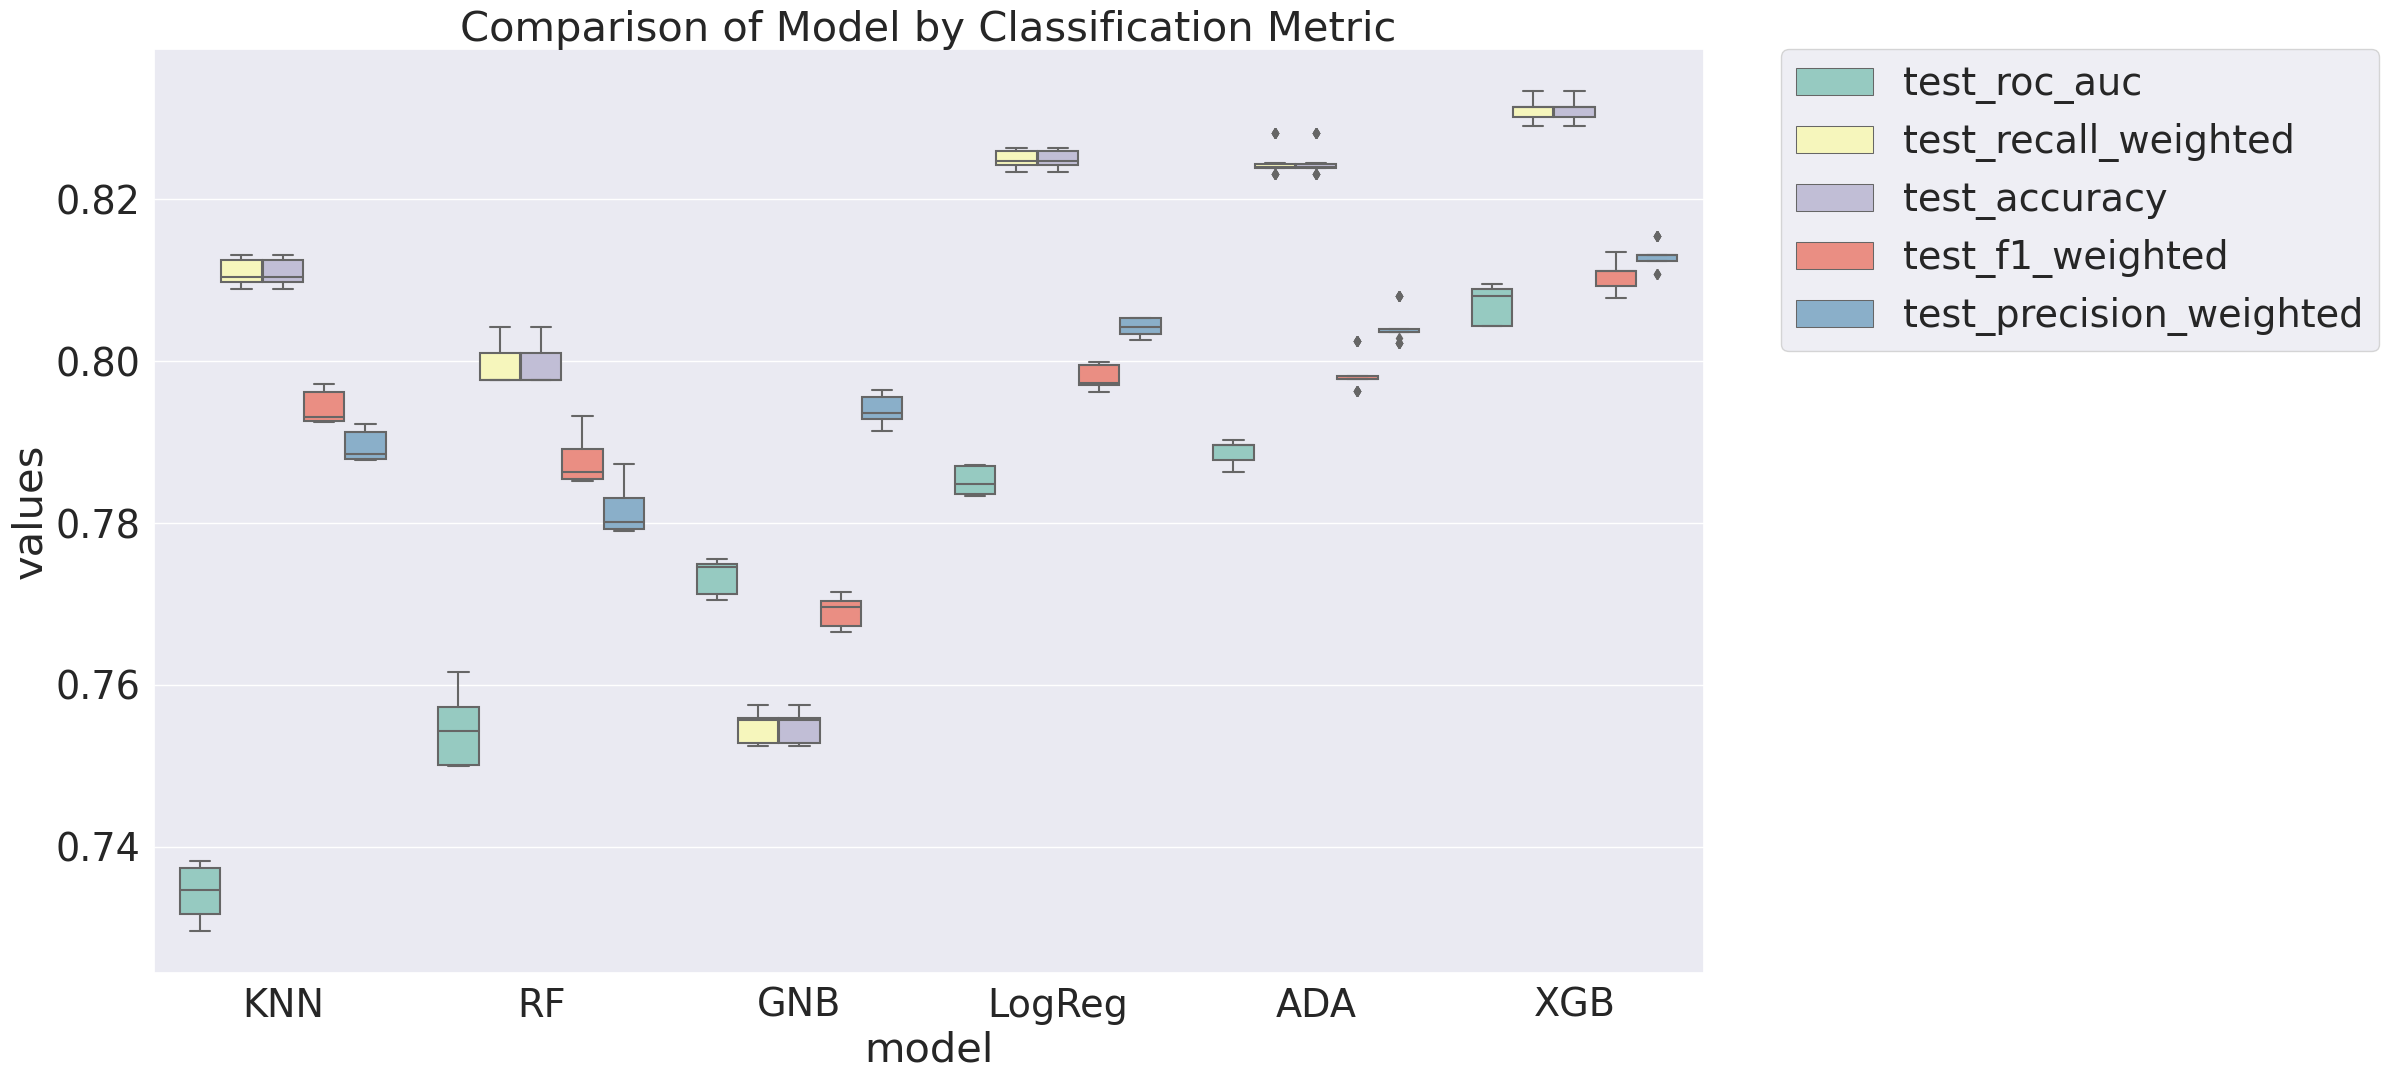

In [85]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.savefig('./benchmark_models_performance.png',dpi=300)

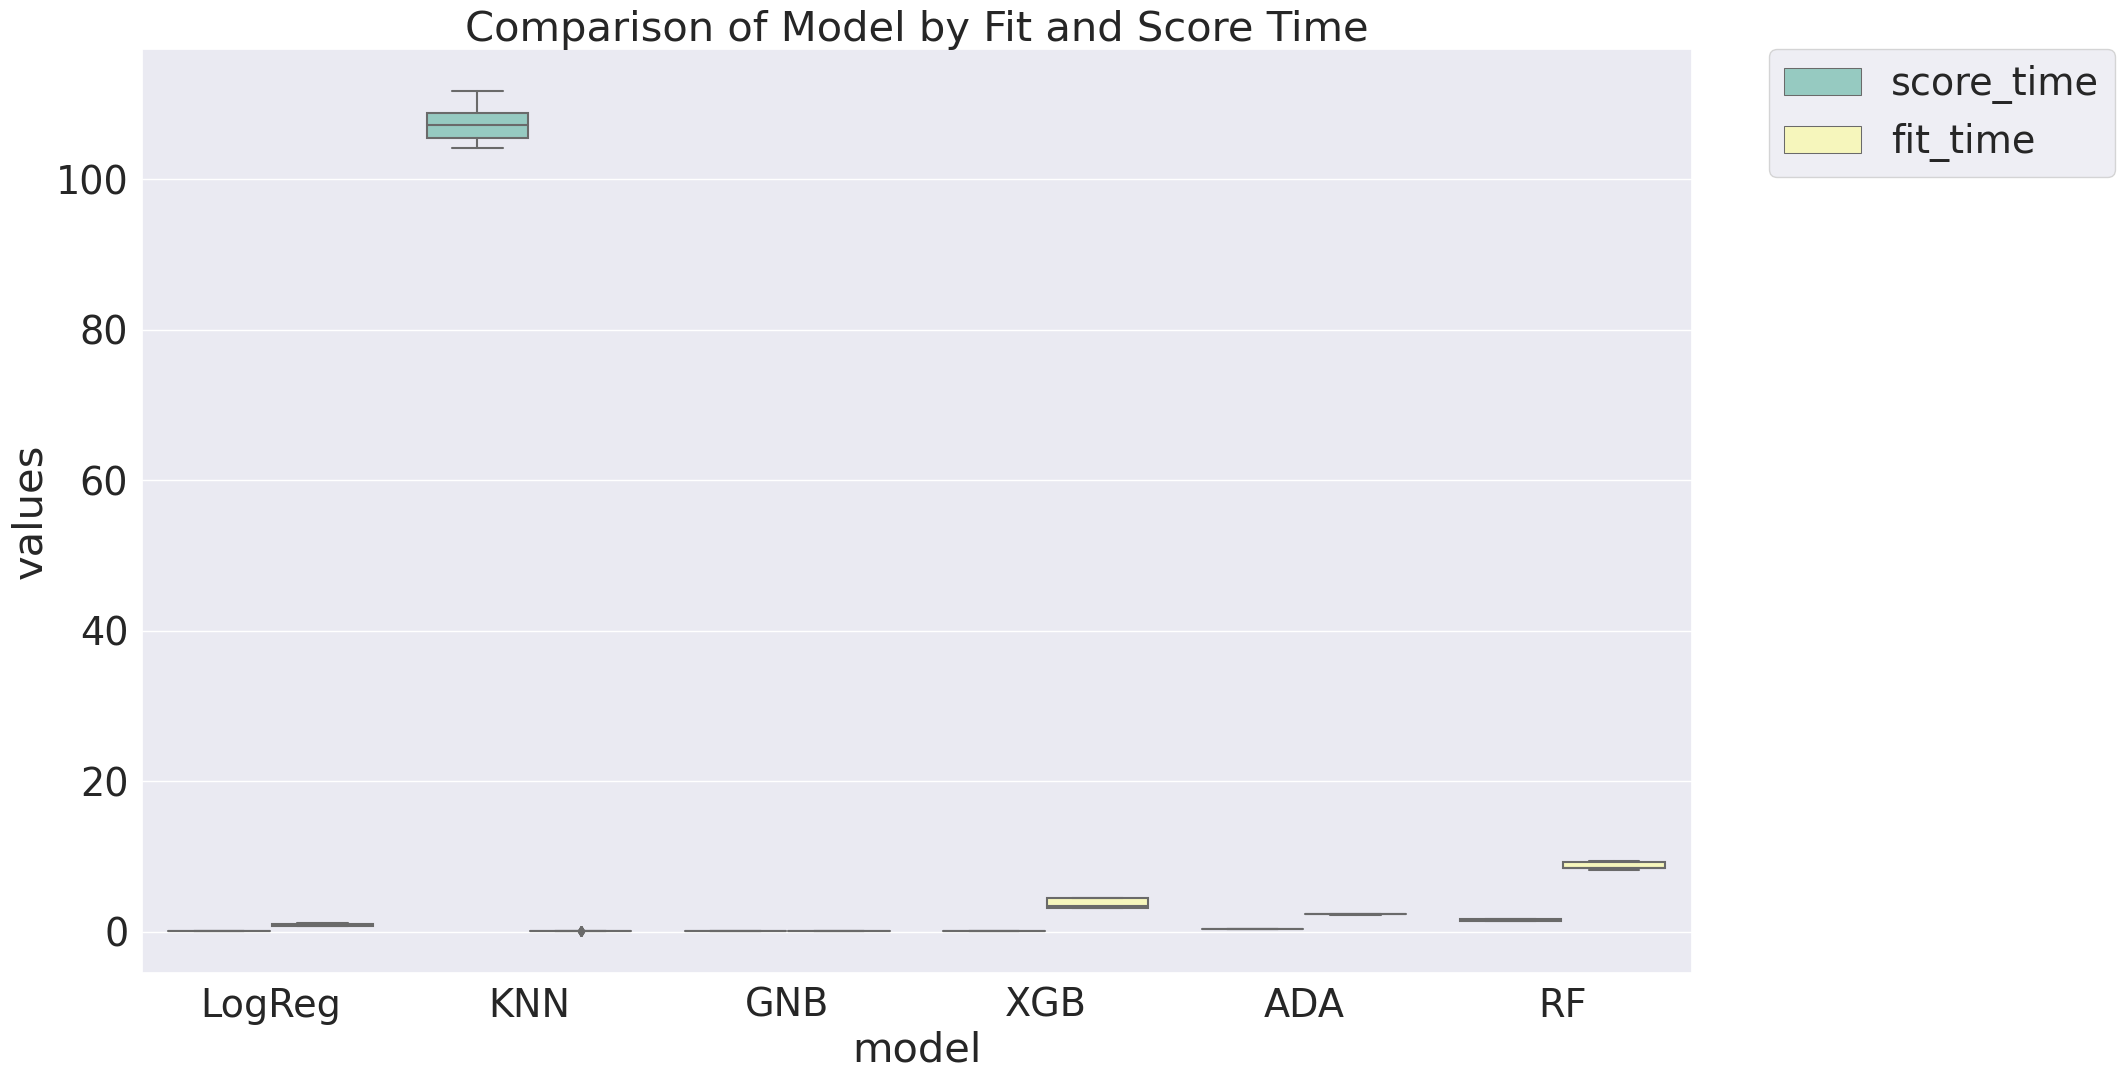

In [86]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_fit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Fit and Score Time')
plt.savefig('./benchmark_models_time.png',dpi=300)

In [87]:
metrics = list(set(results_long_nofit.metrics.values))
bootstrap_df.groupby(['model'])[metrics].agg([np.std, np.mean])

test_accuracy           test_f1_weighted           test_roc_auc  \
                 std      mean              std      mean          std   
model                                                                    
ADA         0.001909  0.824810         0.002229  0.798659     0.001478   
GNB         0.001936  0.754960         0.001865  0.769180     0.002092   
KNN         0.001589  0.810717         0.001956  0.793990     0.003337   
LogReg      0.001086  0.824816         0.001364  0.797949     0.001583   
RF          0.002084  0.799050         0.002392  0.787450     0.003812   
XGB         0.001393  0.831260         0.001917  0.810707     0.002103   

                 test_precision_weighted           test_recall_weighted  \
            mean                     std      mean                  std   
model                                                                     
ADA     0.788629                0.002112  0.804459             0.001909   
GNB     0.773463                0.001918  0.794078             0.001936   
KNN     0.733773                0.001829  0.789240             0.001589   
LogReg  0.785047                0.001147  0.804214             0.001086   
RF      0.754124                0.002489  0.781329             0.002084   
XGB     0.807033                0.001429  0.813212             0.001393   

                  
            mean  
model             
ADA     0.824810  
GNB     0.754960  
KNN     0.810717  
LogReg  0.824816  
RF      0.799050  
XGB     0.831260

In [ ]:
gbm_param_grid = {'learning_rate': [0.01,0.1,0.5,0.9],
                'n_estimators': [10,20,50,100,200],
                'subsample': [0.3, 0.5, 0.9],
                'colsample_bytree_vals' : [0.1, 0.5, 0.8, 1],
                'max_depth': [2, 5, 10]
                }


gbm = xgb.XGBClassifier(objective='binary:logistic')

#grid_class = GridSearchCV(estimator=gbm,param_grid=gbm_param_grid, scoring='accuracy', cv=3, verbose=1)
grid_class = RandomizedSearchCV(estimator=gbm,param_distributions=gbm_param_grid, scoring='accuracy', cv=3, verbose=1, n_iter=50, n_jobs=-1)

grid_class.fit(X_train, y_train)

print("Best parameters found: ",grid_class.best_params_)

print("Best accuracy found: ", grid_class.best_score_)

In [89]:
print(XXXXX)

NameError: name 'XXXXX' is not defined

In [ ]:
# Split the data into training and test sets

xg_cl = xgb.XGBClassifier(objective='binary:logistic', 
                        n_estimators=200, 
                        seed=123,
                        learning_rate=0.9,
                        subsample=0.9,
                        colsample_bytree_vals=0.5,
                        max_depth=2)
                        
xg_cl.fit(X_train, y_train)

preds_xgb = xg_cl.predict(X_test)

In [ ]:
matrix = confusion_matrix(y_test, preds_xgb)
cm_display = ConfusionMatrixDisplay(matrix)
cm_display.plot()
plt.show()

print(confusion_matrix(y_test, preds_xgb))
print(classification_report(y_test, preds_xgb))

In [ ]:
# Plot the feature importances
fig, ax = plt.subplots(figsize=(20, 12))
xgb.plot_importance(xg_cl, ax=ax)
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, preds_xgb)

In [ ]:
# OR to log a final metric at the end of training you can also use wandb.summary
wandb.summary["accuracy"] = accuracy

In [ ]:
# OR to log a final metric at the end of training you can also use wandb.summary
wandb.summary["accuracy"] = accuracy
# Visualize single plot
wandb.sklearn.plot_confusion_matrix(y_test, preds_xgb)

In [ ]:
X_train.columns

In [ ]:
dump(xg_cl, './models/xgb_v3.joblib') 